<a href="https://colab.research.google.com/github/milleniaizzanch/Mini-Project/blob/main/Project_Akhir_Prediksi_Harga_Rumah_menggunakan_Model_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [29]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [31]:
data_location = '../content/harga_real_estate.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(414, 5)

In [32]:
row_data.head()

,No,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
0,1,32.0,84.87882,10,37.9
1,2,19.5,306.59470,9,42.2
2,3,13.3,561.98450,5,47.3
3,4,13.3,561.98450,5,54.8
4,5,5.0,390.56840,5,43.1


In [33]:
df = row_data.dropna(axis=0)
df.describe()

,No,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko,Y_harga_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,17.712560,1083.885689,4.094203,37.980193
std,119.655756,11.392485,1262.109595,2.945562,13.606488
min,1.000000,0.000000,23.382840,0.000000,7.600000
25%,104.250000,9.025000,289.324800,1.000000,27.700000
50%,207.500000,16.100000,492.231300,4.000000,38.450000
75%,310.750000,28.150000,1454.279000,6.000000,46.600000
max,414.000000,43.800000,6488.021000,10.000000,117.500000


In [34]:
print(df.dtypes)

No                  int64
X1_Usia_Rumah     float64
X2_jarak_MRT      float64
X3_jumlah_toko      int64
Y_harga_unit      float64
dtype: object


In [44]:
x = df.drop(["Y_harga_unit"],axis = 1)
x.head()

,No,X1_Usia_Rumah,X2_jarak_MRT,X3_jumlah_toko
0,1,32.0,84.87882,10
1,2,19.5,306.59470,9
2,3,13.3,561.98450,5
3,4,13.3,561.98450,5
4,5,5.0,390.56840,5


In [45]:
y = df["Y_harga_unit"]
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y_harga_unit, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 70)

In [48]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model  = KNN_Reg(n_neighbors = 1)

#training model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  136.77168674698797 
 Accuracy:  0.3135348821370718


In [49]:
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

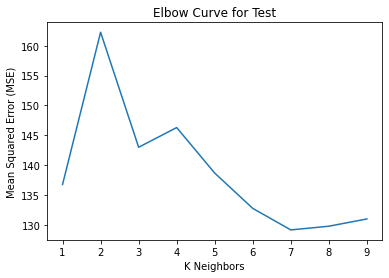

In [50]:
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [51]:
new_model  = KNN_Reg(n_neighbors = 3)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n',
      'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 28.223799431107942 
 Accuracy of old model (%): 31.35348821370718 
 Improvement (%): -3.129688782599238


In [57]:
data_Y_harga_unit_rumah = np.array([[1,32.0,84.87882,10]])
pred_old = model.predict(data_Y_harga_unit_rumah)
pred_new = new_model.predict(data_Y_harga_unit_rumah)

print(' Hasil Prediksi harga rumah dengan old model: Rp', pred_old, 'Juta\n',
      'Hasil Prediksi harga rumah dengan new model: Rp', pred_new, 'Juta')

 Hasil Prediksi harga rumah dengan old model: Rp [37.9] Juta
 Hasil Prediksi harga rumah dengan new model: Rp [49.83333333] Juta


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
